In [2]:
# 导入所需库
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# 加载数据集的函数
# def load_images_from_folder(folder, size=(256, 256)):
#     images = []
#     for filename in os.listdir(folder):
#         img = load_img(os.path.join(folder, filename), target_size=size)
#         if img is not None:
#             images.append(img_to_array(img))
#     return np.array(images)

def load_images_from_folders(parent_folder, size=(256, 256)):
    images = []
    for folder in os.listdir(parent_folder):
        folder_path = os.path.join(parent_folder, folder)
        if os.path.isdir(folder_path):  # 检查这个路径是否为文件夹
            for filename in os.listdir(folder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # 添加图片格式检查
                    img_path = os.path.join(folder_path, filename)
                    try:
                        img = load_img(img_path, target_size=size)
                        images.append(img_to_array(img))
                    except Exception as e:
                        print(f"无法加载图片: {img_path}。错误: {e}")
    return np.array(images)

# def load_images_from_folders(parent_folder, size=(256, 256)):
#     images = []
#     for folder in os.listdir(parent_folder):
#         folder_path = os.path.join(parent_folder, folder)
#         if os.path.isdir(folder_path):  # 检查这个路径是否为文件夹
#             for filename in os.listdir(folder_path):
#                 img = load_img(os.path.join(folder_path, filename), target_size=size)
#                 if img is not None:
#                     images.append(img_to_array(img))
#     return np.array(images)

def create_autoencoder(input_shape=(256, 256, 3)):
    input_img = tf.keras.Input(shape=input_shape)
    # 编码器部分
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    # 添加Dropout层进行正则化
    x = layers.Dropout(0.5)(x)
    # 编码器的更多层可以在这里加入...
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # 解码器部分
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    # 添加Dropout层进行正则化
    x = layers.Dropout(0.5)(x)
    # 解码器的更多层可以在这里加入...
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder
# 加载数据
# train_data_path = 'healfolder'  # 训练数据文件夹路径
# test_data_path = 'sickfolder'   # 测试数据文件夹路径
train_data_path = 'trainfolder'  # 训练数据文件夹路径

# B22-31_1


x_train = load_images_from_folders(train_data_path) / 255.0
# x_test = load_images_from_folders(test_data_path) / 255.0

# 创建自编码器模型
autoencoder = create_autoencoder()

# 训练模型
history = autoencoder.fit(
    x_train, x_train, 
    epochs=20,  # 可能需要更多的训练周期
    batch_size=32, 
    shuffle=True,
    # validation_data=(x_test, x_test)  # 使用独立的测试集作为验证数据
)



Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.0842
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0145
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0225
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0220
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0187
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0141
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0100
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0088
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0089
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0082
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0072
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0068
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0067
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0066
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0060
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0060
E

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_images_from_folder(parent_folder, size=(256, 256)):
    print(parent_folder)
    images = []
    for filename in os.listdir(parent_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # 添加图片格式检查
            img_path = os.path.join(parent_folder, filename)
            try:
                # print(img_path)
                img = load_img(img_path, target_size=size)
                images.append(img_to_array(img))
            except Exception as e:
                print(f"无法加载图片: {img_path}。错误: {e}")
    return np.array(images)

def calculate_patient_loss(model, folder):
    images = load_images_from_folder(folder) / 255.0
    reconstructions = model.predict(images)
    loss = tf.keras.losses.mae(reconstructions, images)
    avg_loss = tf.reduce_mean(loss).numpy()  # 对单个病人文件夹内的所有图片计算平均MAE
    return avg_loss

def calculate_threshold(model, base_folder):
    patient_folders = [os.path.join(base_folder, name) for name in os.listdir(base_folder) 
                       if os.path.isdir(os.path.join(base_folder, name))]
    print('patient_folders========')
    print(patient_folders)
    losses = [calculate_patient_loss(model, folder) for folder in patient_folders]
    print('losses======')
    print(losses)
    mean_loss = np.mean(losses)
    std_loss = np.std(losses)
    threshold = mean_loss + 2 * std_loss  # 这里使用均值加两倍标准差
    return threshold

# 示例用法
# autoencoder = create_autoencoder()  # 假设模型已经被训练
base_folder = 'trainfolder'  # 假设这是包含所有病人子文件夹的根目录

# 计算阈值
threshold = calculate_threshold(autoencoder, base_folder)
print("Calculated threshold:", threshold)


patient_folders========
['trainfolder/B22-25_1', 'trainfolder/B22-26_1']
trainfolder/B22-25_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
trainfolder/B22-26_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
losses======
[0.13274518, 0.13054638]
Calculated threshold: 0.13384456932544708


In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_images_from_folder(parent_folder, size=(256, 256)):
    print(parent_folder)
    images = []
    for filename in os.listdir(parent_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # 添加图片格式检查
            img_path = os.path.join(parent_folder, filename)
            try:
                # print(img_path)
                img = load_img(img_path, target_size=size)
                images.append(img_to_array(img))
            except Exception as e:
                print(f"无法加载图片: {img_path}。错误: {e}")
    return np.array(images)

def calculate_patient_loss(model, folder):
    images = load_images_from_folder(folder) / 255.0
    reconstructions = model.predict(images)
    loss = tf.keras.losses.mae(reconstructions, images)
    avg_loss = tf.reduce_mean(loss).numpy()  # 对单个病人文件夹内的所有图片计算平均MAE
    return avg_loss

def calculate_threshold(model, base_folder):
    patient_folders = [os.path.join(base_folder, name) for name in os.listdir(base_folder) 
                       if os.path.isdir(os.path.join(base_folder, name))]
    print('patient_folders========')
    print(patient_folders)
    losses = [calculate_patient_loss(model, folder) for folder in patient_folders]
    print('losses======')
    print(losses)
    mean_loss = np.mean(losses)
    std_loss = np.std(losses)
    # threshold = mean_loss + 2 * std_loss  # 这里使用均值加两倍标准差
    threshold = mean_loss
    return threshold

# 示例用法
# autoencoder = create_autoencoder()  # 假设模型已经被训练
# base_folder = 'medfolder'  # 假设这是包含所有病人子文件夹的根目录
base_folder = 'baixafolder'


# 计算阈值
threshold = calculate_threshold(autoencoder, base_folder)
print("Calculated threshold:", threshold)


patient_folders========
['baixafolder/B22-69_1', 'baixafolder/B22-73_1']
baixafolder/B22-69_1
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 486ms/step
baixafolder/B22-73_1
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 461ms/step
losses======
[0.13032985, 0.17349161]
Calculated threshold: 0.15191072


In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_images_from_folder(parent_folder, size=(256, 256)):
    print(parent_folder)
    images = []
    for filename in os.listdir(parent_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # 添加图片格式检查
            img_path = os.path.join(parent_folder, filename)
            try:
                # print(img_path)
                img = load_img(img_path, target_size=size)
                images.append(img_to_array(img))
            except Exception as e:
                print(f"无法加载图片: {img_path}。错误: {e}")
    return np.array(images)

def calculate_patient_loss(model, folder):
    images = load_images_from_folder(folder) / 255.0
    reconstructions = model.predict(images)
    loss = tf.keras.losses.mae(reconstructions, images)
    avg_loss = tf.reduce_mean(loss).numpy()  # 对单个病人文件夹内的所有图片计算平均MAE
    return avg_loss

def calculate_threshold(model, base_folder):
    patient_folders = [os.path.join(base_folder, name) for name in os.listdir(base_folder) 
                       if os.path.isdir(os.path.join(base_folder, name))]
    print('patient_folders========')
    print(patient_folders)
    losses = [calculate_patient_loss(model, folder) for folder in patient_folders]
    print('losses======')
    print(losses)
    mean_loss = np.mean(losses)
    std_loss = np.std(losses)
    # threshold = mean_loss + 2 * std_loss  # 这里使用均值加两倍标准差
    threshold = mean_loss
    return threshold

# 示例用法
# autoencoder = create_autoencoder()  # 假设模型已经被训练
# base_folder = 'negfolder'  # 假设这是包含所有病人子文件夹的根目录
base_folder = 'negfolder'


# 计算阈值
threshold = calculate_threshold(autoencoder, base_folder)
print("Calculated threshold:", threshold)


patient_folders========
['negfolder/B22-61_1', 'negfolder/B22-150_1', 'negfolder/B22-60_1']
negfolder/B22-61_1
59/59 ━━━━━━━━━━━━━━━━━━━━ 29s 492ms/step
negfolder/B22-150_1
59/59 ━━━━━━━━━━━━━━━━━━━━ 29s 492ms/step
negfolder/B22-60_1
112/112 ━━━━━━━━━━━━━━━━━━━━ 57s 508ms/step
losses======
[0.1683996, 0.16619869, 0.12776296]
Calculated threshold: 0.15412043


In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_images_from_folder(parent_folder, size=(256, 256)):
    print(parent_folder)
    images = []
    for filename in os.listdir(parent_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # 添加图片格式检查
            img_path = os.path.join(parent_folder, filename)
            try:
                # print(img_path)
                img = load_img(img_path, target_size=size)
                images.append(img_to_array(img))
            except Exception as e:
                print(f"无法加载图片: {img_path}。错误: {e}")
    return np.array(images)

def calculate_patient_loss(model, folder):
    images = load_images_from_folder(folder) / 255.0
    reconstructions = model.predict(images)
    loss = tf.keras.losses.mae(reconstructions, images)
    avg_loss = tf.reduce_mean(loss).numpy()  # 对单个病人文件夹内的所有图片计算平均MAE
    return avg_loss

def calculate_threshold(model, base_folder):
    patient_folders = [os.path.join(base_folder, name) for name in os.listdir(base_folder) 
                       if os.path.isdir(os.path.join(base_folder, name))]
    print('patient_folders========')
    print(patient_folders)
    losses = [calculate_patient_loss(model, folder) for folder in patient_folders]
    print('losses======')
    print(losses)
    mean_loss = np.mean(losses)
    std_loss = np.std(losses)
    # threshold = mean_loss + 2 * std_loss  # 这里使用均值加两倍标准差
    threshold = mean_loss
    return threshold

# 示例用法
# autoencoder = create_autoencoder()  # 假设模型已经被训练
base_folder = 'highfolder'  # 假设这是包含所有病人子文件夹的根目录
# base_folder = 'data-set/ALTA'

# 计算阈值
threshold = calculate_threshold(autoencoder, base_folder)
print("Calculated threshold:", threshold)


patient_folders========
['highfolder/B22-126_1', 'highfolder/B22-38_1', 'highfolder/B22-37_1']
highfolder/B22-126_1
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 511ms/step
highfolder/B22-38_1
59/59 ━━━━━━━━━━━━━━━━━━━━ 29s 489ms/step
highfolder/B22-37_1
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 507ms/step
losses======
[0.16393185, 0.17423485, 0.17082447]
Calculated threshold: 0.16966373


CroppedPaches/B22-106_1
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 517ms/step
avg_loss=======
CroppedPaches
B22-106_1
0.16149233
CroppedPaches/B22-107_1
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 503ms/step
avg_loss=======
CroppedPaches
B22-107_1
0.15857658
CroppedPaches/B22-108_1
82/82 ━━━━━━━━━━━━━━━━━━━━ 43s 523ms/step
avg_loss=======
CroppedPaches
B22-108_1
0.16035143
CroppedPaches/B22-109_1
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 511ms/step
avg_loss=======
CroppedPaches
B22-109_1
0.16104965
CroppedPaches/B22-110_1
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 509ms/step
avg_loss=======
CroppedPaches
B22-110_1
0.15767793
CroppedPaches/B22-111_1
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 522ms/step
avg_loss=======
CroppedPaches
B22-111_1
0.16236086
CroppedPaches/B22-112_1
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 503ms/step
avg_loss=======
CroppedPaches
B22-112_1
0.17344996
CroppedPaches/B22-126_1
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 513ms/step
avg_loss=======
CroppedPaches
B22-126_1
0.15811044
CroppedPaches/B22-129_1
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 503ms/step

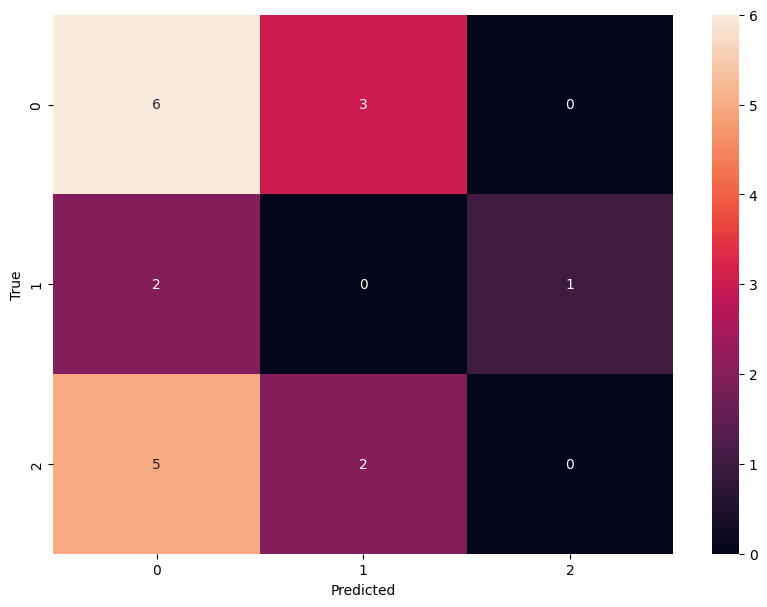

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_images_from_folder(parent_folder, size=(256, 256)):
    print(parent_folder)
    images = []
    for filename in os.listdir(parent_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # 添加图片格式检查
            img_path = os.path.join(parent_folder, filename)
            try:
                # print(img_path)
                img = load_img(img_path, target_size=size)
                images.append(img_to_array(img))
            except Exception as e:
                print(f"无法加载图片: {img_path}。错误: {e}")
    return np.array(images)

def calculate_patient_loss(model, folder):
    images = load_images_from_folder(folder) / 255.0
    reconstructions = model.predict(images)
    loss = tf.keras.losses.mae(reconstructions, images)
    avg_loss = tf.reduce_mean(loss).numpy()  # 对单个病人文件夹内的所有图片计算平均MAE
    return avg_loss

actual_labels = [0, 1, 1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

# 评估病人状态并计算准确度、精确度和召回率
def evaluate_patients(model, base_folder, actual_labels):
    predictions = []
    for folder in sorted(os.listdir(base_folder)):
        if os.path.isdir(os.path.join(base_folder, folder)):
            avg_loss = calculate_patient_loss(model, os.path.join(base_folder, folder))
            # 假设异常的病人文件夹名包含"abnormal"
            print('avg_loss=======')
            print(base_folder)
            print(folder)
            print(avg_loss)
            # predicted_label = 1 if avg_loss > threshold else 0
                        # 根据avg_loss的值分配标签
            if avg_loss < 0.165:
                predicted_label = -1  # NEGATIVA
            elif 0.165 <= avg_loss <= 0.17:
                predicted_label = 0   # BAIXA
            else:
                predicted_label = 1   # ALTA
            predictions.append(predicted_label)

    print("Accuracy = {}".format(accuracy_score(actual_labels, predictions)))
    # print("Precision = {}".format(precision_score(actual_labels, predictions, average='weighted')))
    # print("Recall = {}".format(recall_score(actual_labels, predictions, average='weighted')))
    print("Precision = {}".format(precision_score(actual_labels, predictions)))
    print("Recall = {}".format(recall_score(actual_labels, predictions)))

    # 生成混淆矩阵
    cm = confusion_matrix(actual_labels, predictions)

    # 使用Seaborn绘制混淆矩阵图
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# x_test = load_images_from_folders('CroppedPaches') / 255.0
x_test = 'CroppedPaches'

evaluate_patients(autoencoder, x_test, actual_labels)
